In [80]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.ndimage as scpimg
import skimage.feature


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

In [15]:
f = h5py.File('../data/mock_divergence_mesh_360_box_720_slim_10.h5', 'r')
divergence_field = f['divergence'][...]
f.close()


f = h5py.File('../data/watershed_mock_divergence_mesh_360_box_720_slim_10.h5', 'r')
watershed_field = f['watershed_group'][...]
f.close()

In [110]:
slice_id = 150
divergence_slice = divergence_field[:,slice_id,:]
watershed_slice = watershed_field[:,slice_id,:]

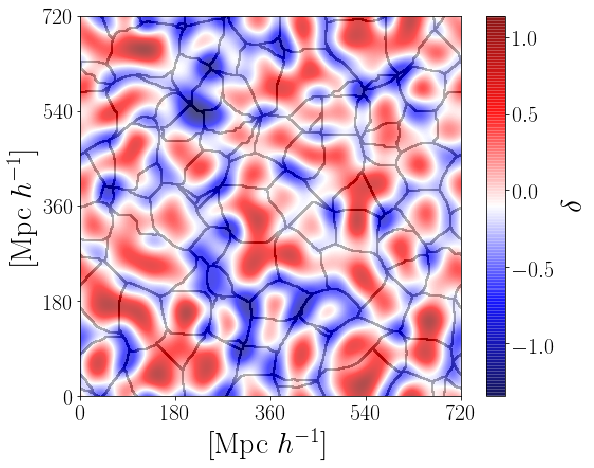

In [121]:
plt.figure(figsize=(9,7))

result = scpimg.sobel(np.sin(watershed_slice)/0.5)
result[result!=0] = -1
sx = scpimg.sobel(watershed_slice, axis=0, mode='wrap')
sy = scpimg.sobel(watershed_slice, axis=1, mode='wrap')
sob = np.hypot(sx, sy)
sob[sob!=0] = -1

plt.imshow(sob, cmap=plt.cm.gray, 
          extent=[0,720,0,720])

factor = -35.2150910460585
plt.imshow(divergence_slice/factor, 
           extent=[0,720,0,720], cmap='seismic', alpha=0.7)

plt.colorbar(label="$\delta$")
plt.xlabel("[Mpc $h^{-1}$]")
plt.ylabel("[Mpc $h^{-1}$]")
plt.xticks(np.linspace(0,720,5))
plt.yticks(np.linspace(0,720,5))
plt.savefig("example_watershed.pdf", bbox_inches='tight')